In [10]:
# Установка и загрузка необходимых пакетов
if (!require(googledrive)) install.packages("googledrive")
if (!require(lmtest)) install.packages("lmtest")
if (!require(car)) install.packages("car")
library(googledrive)
library(lmtest)
library(car)



In [15]:
# 1. Авторизация и загрузка файла с Google Диска
# Авторизуйтесь в Google Диске (следуйте инструкциям в браузере)
drive_auth()

# Укажите имя файла на Google Диске
file_name <- "flats.csv"
file <- drive_find(file_name, type = "csv")

# Загрузка файла в временную папку
temp_file <- tempfile(fileext = ".csv")
drive_download(file, path = temp_file, overwrite = TRUE)

# Чтение данных
flats1 <- read.csv(temp_file, sep = ";", dec = ",", fileEncoding = "Windows-1251")



The googledrive package is requesting access to your Google account.
Enter '1' to start a new auth process or select a pre-authorized account.
1: Send me to the browser for a new auth process.
2: larcadaniil@gmail.com


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=ff0693a51f29398692ddc6ddcd354245&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQVVKUi14NnZlMlhPZ21XWVRHdWNlejRxYXE3M0RPN2EwNFhRS0puNGliRjg4WW56WFVCaGtlMTF2SjgwYVYtZWhnSUUyZyIsInN0YXRlIjoiZmYwNjkzYTUxZjI5Mzk4NjkyZGRjNmRkY2QzNTQyNDUifQ==


File downloaded:

• flats.csv <id: 1YoChoD9FdaNq16dP4IjC9ZFiuRwkioyJ>

Saved locally as:

• /tmp/RtmpKhona5/filec6310d8c437.csv



In [18]:
# 2. Переименование столбцов и фильтрация данных
colnames(flats1) <- c("Type", "Rent", "Floor", "TotalFloors", "Area", "Furniture")
# Преобразуем Furniture в фактор
flats1$Furniture <- as.factor(flats1$Furniture)
# Фильтрация: убираем NA и устанавливаем реалистичный диапазон Rent
flats <- flats1[!is.na(flats1$Rent) & flats1$Rent < 20000 & flats1$Rent > 1000, ]

# Проверка данных
cat("Проверка данных:\n")
summary(flats)



Проверка данных:


     Type                Rent           Floor         TotalFloors    
 Length:47          Min.   : 6500   Min.   : 1.000   Min.   : 3.000  
 Class :character   1st Qu.:10000   1st Qu.: 2.000   1st Qu.: 5.000  
 Mode  :character   Median :12000   Median : 3.000   Median : 5.000  
                    Mean   :12079   Mean   : 3.489   Mean   : 7.085  
                    3rd Qu.:13250   3rd Qu.: 4.000   3rd Qu.: 9.000  
                    Max.   :19000   Max.   :13.000   Max.   :17.000  
      Area       Furniture
 Min.   : 3.00   есть:34  
 1st Qu.:18.50   нет :13  
 Median :32.00            
 Mean   :28.86            
 3rd Qu.:38.00            
 Max.   :55.00            

Этот фрагмент переименовывает столбцы в английские названия (Тип, Аренда и т. д.), чтобы с ними было проще работать. Он преобразует столбец Мебель в категорию (например, «да» или «нет» в зависимости от наличия мебели) с помощью as.factor(). Затем он фильтрует данные, чтобы создать новый фрейм данных квартиры, оставляя только те строки, в которых Аренда не пропущена и находится в диапазоне от 1000 до 20000 рублей, чтобы избежать странных значений (например, отрицательной аренды или безумно высоких цен).

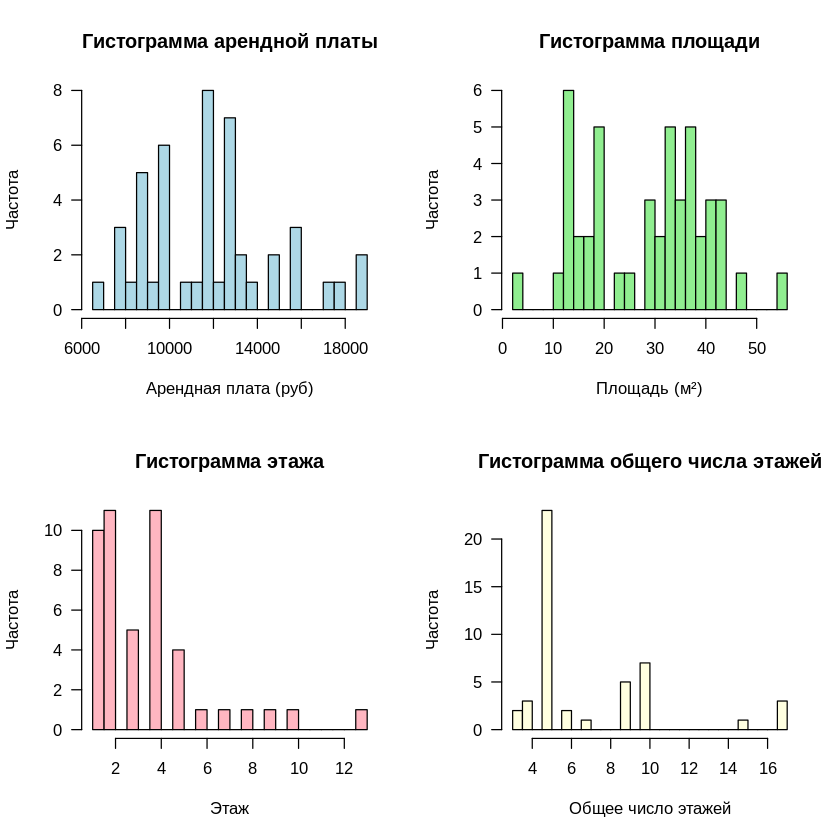

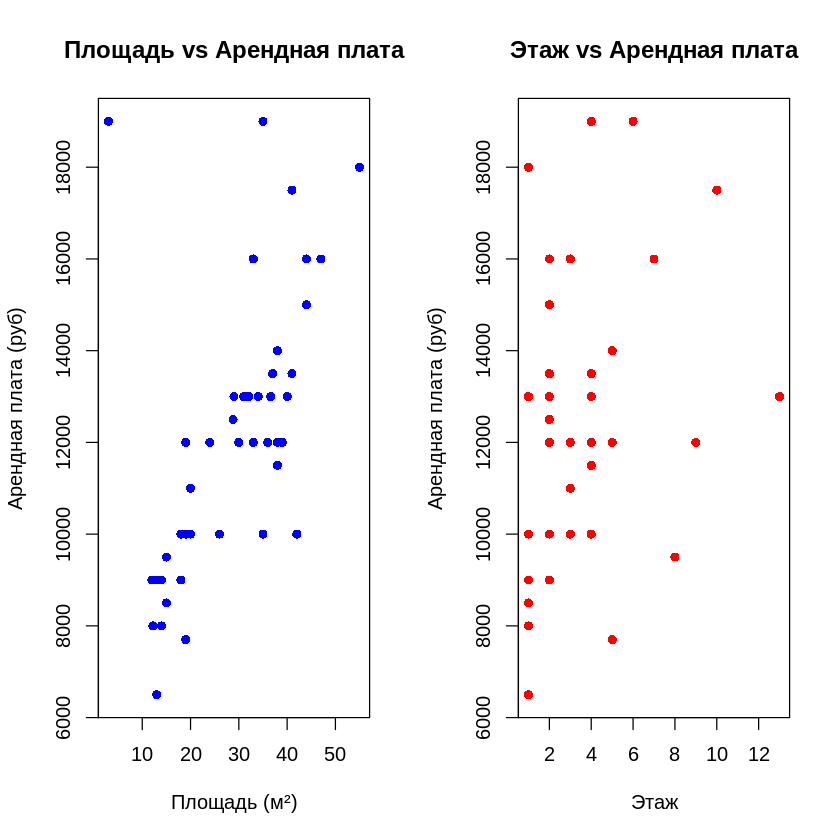

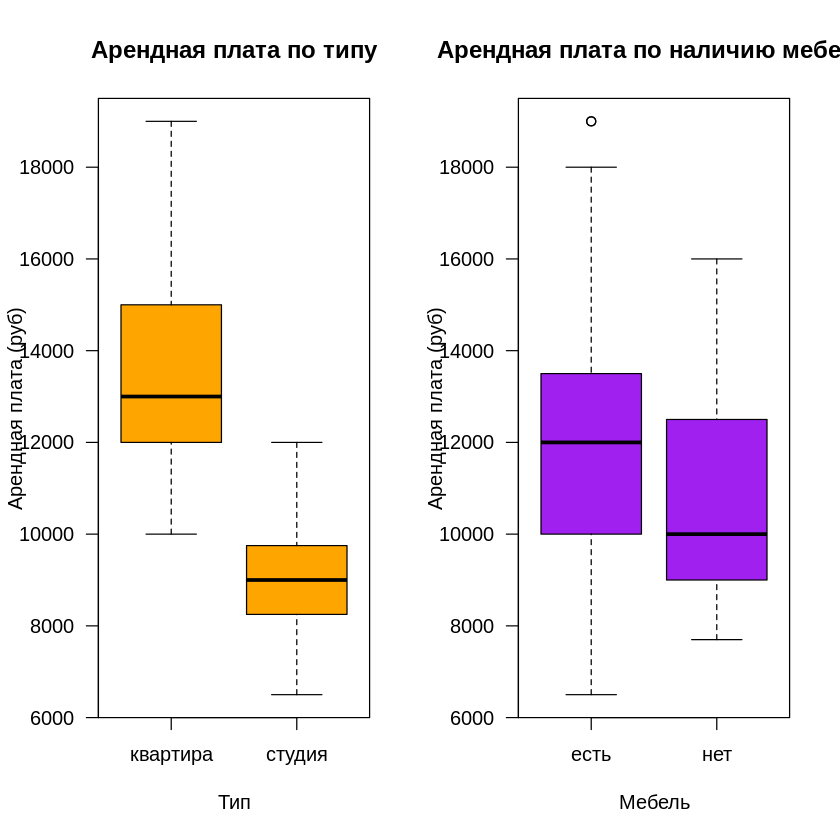

In [19]:
# 3. Построение графиков
# Гистограммы
par(mfrow = c(2, 2)) # Разделяем окно на 4 графика
hist(flats$Rent, breaks = 20, main = "Гистограмма арендной платы", xlab = "Арендная плата (руб)", ylab = "Частота", col = "lightblue", las = 1)
hist(flats$Area, breaks = 20, main = "Гистограмма площади", xlab = "Площадь (м²)", ylab = "Частота", col = "lightgreen", las = 1)
hist(flats$Floor, breaks = 20, main = "Гистограмма этажа", xlab = "Этаж", ylab = "Частота", col = "lightpink", las = 1)
hist(flats$TotalFloors, breaks = 20, main = "Гистограмма общего числа этажей", xlab = "Общее число этажей", ylab = "Частота", col = "lightyellow", las = 1)
par(mfrow = c(1, 1)) # Сбрасываем настройки окна

# Диаграммы рассеяния
par(mfrow = c(1, 2))
plot(flats$Area, flats$Rent, main = "Площадь vs Арендная плата", xlab = "Площадь (м²)", ylab = "Арендная плата (руб)", col = "blue", pch = 16)
plot(flats$Floor, flats$Rent, main = "Этаж vs Арендная плата", xlab = "Этаж", ylab = "Арендная плата (руб)", col = "red", pch = 16)
par(mfrow = c(1, 1))

# Диаграммы размаха
par(mfrow = c(1, 2))
boxplot(Rent ~ Type, data = flats, main = "Арендная плата по типу", xlab = "Тип", ylab = "Арендная плата (руб)", col = "orange", las = 1)
boxplot(Rent ~ Furniture, data = flats, main = "Арендная плата по наличию мебели", xlab = "Мебель", ylab = "Арендная плата (руб)", col = "purple", las = 1)
par(mfrow = c(1, 1))



Гистограммы: создаются четыре гистограммы (для арендной платы, площади, этажа и общего количества этажей), чтобы показать, как часто встречаются различные значения

Гистограмма арендной платы может показать, что большинство квартир стоят от 5000 до 10000 рублей.par(mfrow = c(2, 2))

Точечные диаграммы: на них показаны площадь в зависимости от арендной платы (синие точки) и этаж в зависимости от арендной платы (красные точки), чтобы можно было увидеть, стоят ли больше квартиры большей площади или расположенные выше

Ящичковые диаграммы: они показывают, как арендная плата меняется в зависимости от типа (например, однокомнатные и двухкомнатные квартиры) и меблировки (меблированные и немеблированные).

На каждой ящичковой диаграмме показан диапазон арендной платы, выбросы обозначены точками

In [20]:
# 4. Корреляционная матрица
cat("\n=== КОРРЕЛЯЦИЯ ===\n")
cor_matrix <- cor(flats[, sapply(flats, is.numeric)], method = "spearman", use = "complete.obs")
print(cor_matrix)




=== КОРРЕЛЯЦИЯ ===
                 Rent     Floor TotalFloors      Area
Rent        1.0000000 0.3773195   0.4772734 0.6941771
Floor       0.3773195 1.0000000   0.3814814 0.2526194
TotalFloors 0.4772734 0.3814814   1.0000000 0.5951880
Area        0.6941771 0.2526194   0.5951880 1.0000000


Показать, как связаны числовые переменные (Аренда, Площадь, Этаж, Общее количество этажей).sapply(flats, is.numeric) выбирает числовые столбцы, а cor() вычисляет корреляцию Спирмена, которая работает даже в том случае, если данные не являются абсолютно нормальными.

In [21]:
# 5. Парная регрессия (Rent ~ Area)
cat("\n=== ПАРНАЯ РЕГРЕССИЯ ===\n")
model1 <- lm(Rent ~ Area, data = flats)
print(summary(model1))
cat("- Каждый дополнительный м² увеличивает арендную плату на ", round(coef(model1)["Area"], 1), " руб.\n")




=== ПАРНАЯ РЕГРЕССИЯ ===

Call:
lm(formula = Rent ~ Area, data = flats)

Residuals:
    Min      1Q  Median      3Q     Max 
-4092.7 -1293.0  -439.4   597.2 10886.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7653.5      932.1   8.211 1.70e-10 ***
Area           153.3       29.9   5.127 6.01e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2413 on 45 degrees of freedom
Multiple R-squared:  0.3688,	Adjusted R-squared:  0.3547 
F-statistic: 26.29 on 1 and 45 DF,  p-value: 6.013e-06

- Каждый дополнительный м² увеличивает арендную плату на  153.3  руб.


Простая линейная регрессия, чтобы показать, как площадь влияет на арендную плату.
Показывает такие детали, как наклон (на сколько увеличивается арендная плата за квадратный метр), p-значения (для проверки реальности взаимосвязи) и R² (насколько хорошо подходит модель). Последняя строка выводит наклонную линию, округлённую до одного знака после запятой, чтобы показать нам что-то вроде «каждый дополнительный квадратный метр увеличивает стоимость аренды на 200 рублей».

In [22]:
# 6. Проверка остатков на нормальность
cat("\n=== ПРОВЕРКА ОСТАТКОВ НА НОРМАЛЬНОСТЬ ===\n")
shapiro_test <- shapiro.test(residuals(model1))
print(shapiro_test)
if (shapiro_test$p.value < 0.05) {
  cat("Вывод: Остатки НЕ нормально распределены (p =", format.pval(shapiro_test$p.value), ")\n")
} else {
  cat("Вывод: Остатки нормально распределены (p =", shapiro_test$p.value, ")\n")
}



=== ПРОВЕРКА ОСТАТКОВ НА НОРМАЛЬНОСТЬ ===

	Shapiro-Wilk normality test

data:  residuals(model1)
W = 0.80164, p-value = 1.727e-06

Вывод: Остатки НЕ нормально распределены (p = 1.727e-06 )


Это проверка на соответствие ошибок (остатков) регрессии model1 нормальному распределению, которое нравится регрессионным моделям. Остатки — это разница между фактической и прогнозируемой арендной платой.

In [23]:

# 7. Проверка на гетероскедастичность
cat("\n=== ПРОВЕРКА НА ГЕТЕРОСКЕДАСТИЧНОСТЬ ===\n")
bptest_result <- bptest(model1)
print(bptest_result)
if (bptest_result$p.value < 0.05) {
  cat("Вывод: Присутствует гетероскедастичность (p =", format.pval(bptest_result$p.value), ")\n")
} else {
  cat("Вывод: Гетероскедастичность ОТСУТСТВУЕТ (p =", bptest_result$p.value, ")\n")
}




=== ПРОВЕРКА НА ГЕТЕРОСКЕДАСТИЧНОСТЬ ===

	studentized Breusch-Pagan test

data:  model1
BP = 3.1539, df = 1, p-value = 0.07575

Вывод: Гетероскедастичность ОТСУТСТВУЕТ (p = 0.07574792 )


Это проверка на изменение дисперсии остатков в зависимости от площади (так называемая гетероскедастичность), которая может снизить надёжность модели. bptest() выполняет тест Бреуша-Пагана: значение p ниже 0,05 означает, что дисперсия не постоянна, что является проблемой.

In [36]:
# 8. Устранение гетероскедастичности
cat("\n=== УСТРАНЕНИЕ ГЕТЕРОСКЕДАСТИЧНОСТИ ===\n")
# Способ 1: Деление на значение фактора
flats$Rent_scaled <- flats$Rent / flats$Area
model2 <- lm(Rent_scaled ~ Area, data = flats)

# Способ 2: Логарифмирование зависимой переменной
if (any(flats$Rent <= 0, na.rm = TRUE)) {
  cat("Ошибка: В столбце Rent есть нулевые или отрицательные значения\n")
} else {
  flats$log_Rent <- log(flats$Rent)
  model3 <- lm(log_Rent ~ Area, data = flats)
}





=== УСТРАНЕНИЕ ГЕТЕРОСКЕДАСТИЧНОСТИ ===


Это позволяет устранить гетероскедастичность двумя способами:

Масштабирование: делит арендную плату на площадь, чтобы получить арендную плату за квадратный метр (арендная плата_масштабированная), затем строит новую модель (модель2) с этим результатом. Это может помочь, если дисперсия зависит от размера.

Логарифмическое преобразование: проверяет, есть ли в арендной плате нулевые или отрицательные значения (поскольку их нельзя взять в логарифм). Если все значения положительные, создает log_арендной платы (натуральный логарифм арендной платы) и на его основе строит модель3. Если есть нулевые значения, выводит ошибку

In [25]:

# 9. Проверка новых моделей
cat("\n=== НОВЫЕ МОДЕЛИ ===\n")
cat("Модель с делением на площадь:\n")
print(summary(model2))
cat("\nМодель с логарифмированием Rent:\n")
print(summary(model3))


=== НОВЫЕ МОДЕЛИ ===
Модель с делением на площадь:

Call:
lm(formula = Rent_scaled ~ Area, data = flats)

Residuals:
   Min     1Q Median     3Q    Max 
-574.8 -357.2  -76.0   71.5 4941.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1487.607    304.967   4.878 1.38e-05 ***
Area         -31.757      9.783  -3.246  0.00221 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 789.6 on 45 degrees of freedom
Multiple R-squared:  0.1897,	Adjusted R-squared:  0.1717 
F-statistic: 10.54 on 1 and 45 DF,  p-value: 0.002212


Модель с логарифмированием Rent:

Call:
lm(formula = log_Rent ~ Area, data = flats)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37290 -0.08759 -0.02073  0.06213  0.83632 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.974904   0.073540 122.041  < 2e-16 ***
Area        0.013658   0.002359   5.789 6.41e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘*

Здесь показаны результаты модели 2 (масштабированная арендная плата) и модели 3 (логарифмическая арендная плата, если она существует). Сводка() для каждой модели содержит коэффициенты, p-значения и R², поэтому мы можем увидеть, насколько хорошо они подходят и помогли ли преобразования. Этот шаг позволяет нам сравнить новые модели с исходной, чтобы понять, насколько лучше они объясняют арендную плату.

In [26]:
# 10. Проверка остатков новых моделей на нормальность
cat("\n=== ПРОВЕРКА ОСТАТКОВ НОВЫХ МОДЕЛЕЙ ===\n")
shapiro_test_model2 <- shapiro.test(residuals(model2))
print(shapiro_test_model2)
if (exists("model3")) {
  shapiro_test_model3 <- shapiro.test(residuals(model3))
  print(shapiro_test_model3)
}




=== ПРОВЕРКА ОСТАТКОВ НОВЫХ МОДЕЛЕЙ ===

	Shapiro-Wilk normality test

data:  residuals(model2)
W = 0.4155, p-value = 1.988e-12


	Shapiro-Wilk normality test

data:  residuals(model3)
W = 0.84502, p-value = 1.916e-05



Это проверка на нормальное распределение остатков модели 2 и модели 3 (если она была создана) с помощью теста Шапиро — Уилка. Выводит результаты для модели 2 и, если модель 3 существует, для неё тоже.

In [27]:
# 11. Проверка на гетероскедастичность новых моделей
cat("\n=== ПРОВЕРКА ГЕТЕРОСКЕДАСТИЧНОСТИ НОВЫХ МОДЕЛЕЙ ===\n")
bptest_model2 <- bptest(model2)
gqtest_model2 <- gqtest(model2)
print(bptest_model2)
print(gqtest_model2)
if (exists("model3")) {
  bptest_model3 <- bptest(model3)
  print(bptest_model3)
}




=== ПРОВЕРКА ГЕТЕРОСКЕДАСТИЧНОСТИ НОВЫХ МОДЕЛЕЙ ===

	studentized Breusch-Pagan test

data:  model2
BP = 5.2758, df = 1, p-value = 0.02162


	Goldfeld-Quandt test

data:  model2
GQ = 143.56, df1 = 22, df2 = 21, p-value < 2.2e-16
alternative hypothesis: variance increases from segment 1 to 2


	studentized Breusch-Pagan test

data:  model3
BP = 4.6369, df = 1, p-value = 0.03129



Это проверка на наличие гетероскедастичности в модели 2 и модели 3. Для модели 2 выполняются два теста: Бреуша-Пагана (bptest) и Голдфельда-Куандта (gqtest) для двойной проверки стабильности дисперсии. Для модели 3 выполняется только тест Бреуша-Пагана, но только в том случае, если модель 3 существует. Результаты показывают, сработало ли масштабирование или логарифмирование или у нас по-прежнему есть проблемы с дисперсией.


=== ДИАГРАММА РАССЕЯНИЯ С РЕГРЕССИЕЙ ===


Warning message in predict.lm(model1, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


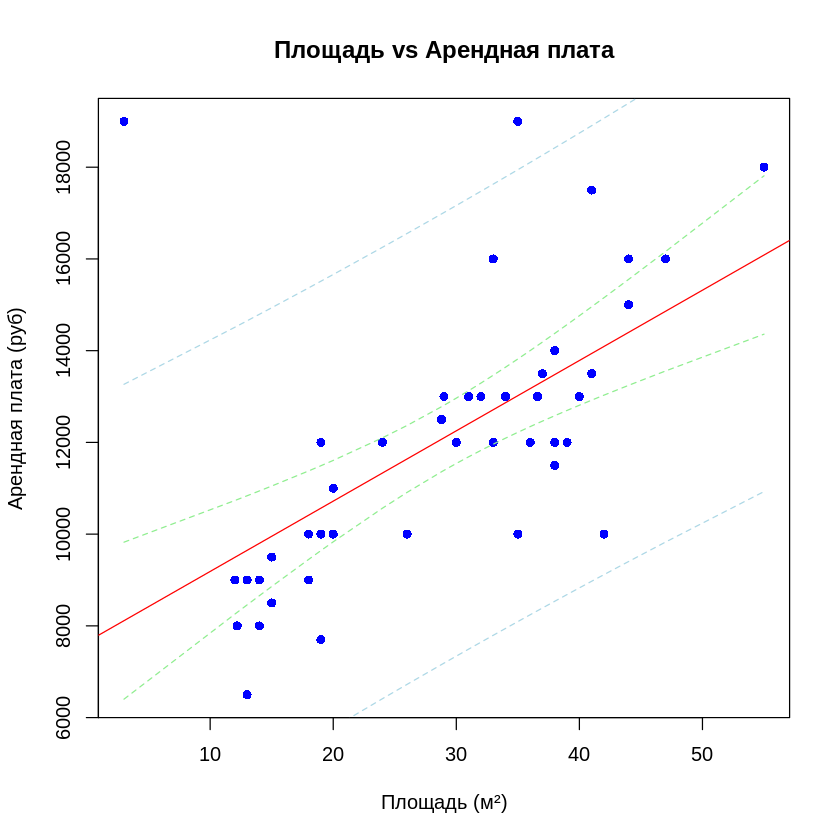

In [28]:
# 12. Диаграмма рассеяния с линией регрессии и доверительными интервалами
cat("\n=== ДИАГРАММА РАССЕЯНИЯ С РЕГРЕССИЕЙ ===\n")
plot(flats$Area, flats$Rent, main = "Площадь vs Арендная плата", xlab = "Площадь (м²)", ylab = "Арендная плата (руб)", col = "blue", pch = 16)
abline(model1, col = "red")
# Сортировка для корректных линий доверительных интервалов
ord <- order(flats$Area)
conf_int <- predict(model1, interval = "confidence")[ord, ]
lines(flats$Area[ord], conf_int[, "lwr"], col = "lightgreen", lty = 2)
lines(flats$Area[ord], conf_int[, "upr"], col = "lightgreen", lty = 2)
pred_int <- predict(model1, interval = "prediction")[ord, ]
lines(flats$Area[ord], pred_int[, "lwr"], col = "lightblue", lty = 2)
lines(flats$Area[ord], pred_int[, "upr"], col = "lightblue", lty = 2)



Это позволяет построить точечную диаграмму площади в зависимости от арендной платы с линией регрессии из модели 1 (выделена красным). Добавляются два набора пунктирных линий:

Доверительные интервалы (зеленые): показывают, где, по нашему мнению, находится истинная линия регрессии, основанная на данных.
Интервалы прогнозирования (синие): показывают диапазон, в котором, по нашим ожиданиям, будут находиться новые значения арендной платы для данного района. Функция order(flats$Area) сортирует данные таким образом, чтобы линии выглядели плавными, а predict() вычисляет интервалы. Этот график показывает, насколько хорошо подходит модель и насколько мы в ней уверены.

In [29]:
# 13. Множественная регрессия
cat("\n=== МНОЖЕСТВЕННАЯ РЕГРЕССИЯ ===\n")
model4 <- lm(Rent ~ Area + Floor + TotalFloors + Furniture, data = flats)
print(summary(model4))




=== МНОЖЕСТВЕННАЯ РЕГРЕССИЯ ===

Call:
lm(formula = Rent ~ Area + Floor + TotalFloors + Furniture, data = flats)

Residuals:
    Min      1Q  Median      3Q     Max 
-3174.6 -1251.4  -249.6   756.2  9944.5 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7558.18     984.09   7.680 1.57e-09 ***
Area           135.29      32.19   4.203 0.000135 ***
Floor          212.29     148.40   1.430 0.159973    
TotalFloors     48.45     120.25   0.403 0.689025    
Furnitureнет -1694.10     787.61  -2.151 0.037280 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2278 on 42 degrees of freedom
Multiple R-squared:  0.4752,	Adjusted R-squared:  0.4252 
F-statistic: 9.506 on 4 and 42 DF,  p-value: 1.449e-05



Это позволяет создать более крупную регрессионную модель (model4), которая использует все факторы (Площадь, Этаж, Общее количество этажей, Мебель) для прогнозирования Аренды. Сводка() показывает, какой вклад вносит каждый фактор и являются ли они значимыми (низкие значения p). Поскольку Мебель является категорией, она создаёт отдельные переменные для своих уровней (например, «есть мебель» и «нет мебели»). Эта модель проверяет, объясняют ли все эти факторы вместе аренду лучше, чем просто Площадь.

In [30]:
# 14. Упрощенная модель (удаляем незначимые факторы)
cat("\n=== УПРОЩЕННАЯ МОДЕЛЬ ===\n")
model5 <- lm(Rent ~ Area + Furniture, data = flats)
print(summary(model5))
cat("Вывод: Удалены Floor и TotalFloors, так как их p-value > 0.05 (незначимы)\n")




=== УПРОЩЕННАЯ МОДЕЛЬ ===

Call:
lm(formula = Rent ~ Area + Furniture, data = flats)

Residuals:
    Min      1Q  Median      3Q     Max 
-3667.0 -1191.8  -316.7   553.4 10332.8 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8217.27     927.92   8.856 2.47e-11 ***
Area           149.98      28.69   5.228 4.53e-06 ***
Furnitureнет -1690.63     755.07  -2.239   0.0303 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2312 on 44 degrees of freedom
Multiple R-squared:  0.4333,	Adjusted R-squared:  0.4076 
F-statistic: 16.82 on 2 and 44 DF,  p-value: 3.742e-06

Вывод: Удалены Floor и TotalFloors, так как их p-value > 0.05 (незначимы)


Это позволяет создать более простую модель (model5), исключив Floor и TotalFloors, поскольку в model4 у них были высокие p-значения (это означает, что они не сильно помогли).

In [31]:
# 15. Прогноз для новой квартиры
cat("\n=== ПРОГНОЗ ДЛЯ НОВОЙ КВАРТИРЫ ===\n")
new_flat <- data.frame(Area = 30, Furniture = factor("есть", levels = levels(flats$Furniture)))
predicted_rent <- predict(model5, newdata = new_flat, interval = "confidence")
print(predicted_rent)




=== ПРОГНОЗ ДЛЯ НОВОЙ КВАРТИРЫ ===
       fit      lwr     upr
1 12716.75 11916.31 13517.2


Это прогнозирует стоимость аренды новой квартиры площадью 30 квадратных метров с мебелью. Фрейм данных new_flat содержит информацию о квартире, в том числе о мебели с теми же категориями, что и в исходных данных. Функция predict() использует model5 для оценки стоимости аренды и выдаёт доверительный интервал (диапазон, в который, как мы уверены, попадает реальная стоимость аренды). Это всё равно что спросить: «Сколько будет стоить эта квартира по нашей модели?»


=== АНАЛИЗ ОСТАТКОВ ===
 lag Autocorrelation D-W Statistic p-value
   1        0.327836      1.332378    0.02
 Alternative hypothesis: rho != 0


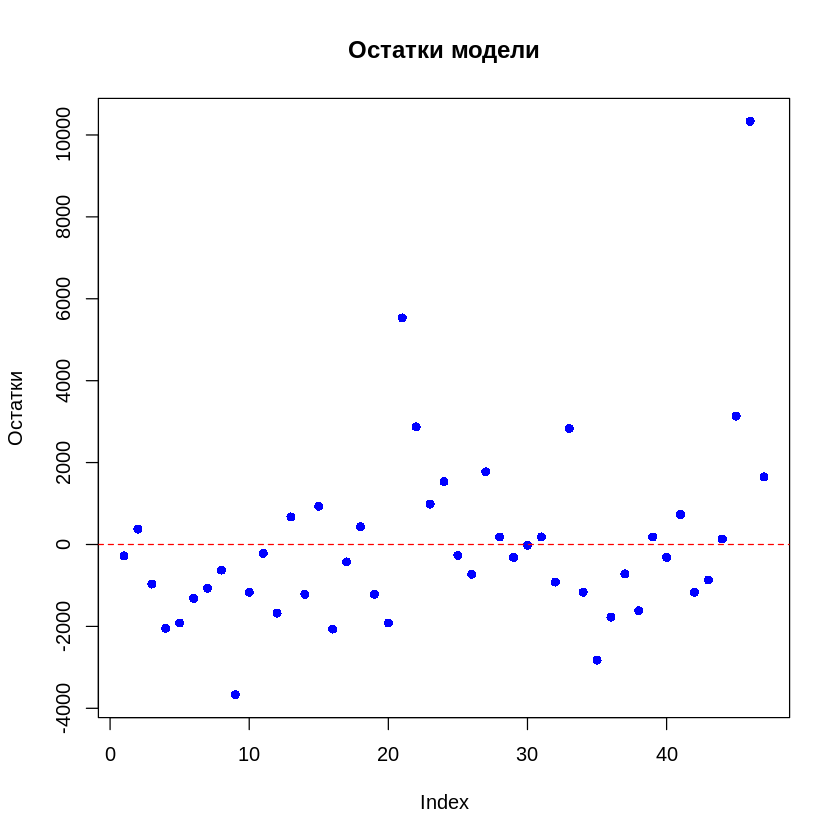

In [32]:
# 16. Анализ остатков упрощенной модели
cat("\n=== АНАЛИЗ ОСТАТКОВ ===\n")
residuals <- residuals(model5)
plot(residuals, main = "Остатки модели", ylab = "Остатки", pch = 16, col = "blue")
abline(h = 0, col = "red", lty = 2)
# Проверка автокорреляции
dwt_result <- durbinWatsonTest(model5)
print(dwt_result)



Здесь рассматриваются остатки (ошибки) model5. Он отображает их (синие точки), чтобы увидеть, являются ли они случайными или отображают закономерности, с красной пунктирной линией на нуле для справки. durbinWatsonTest() проверяет, являются ли остатки автокоррелированными (если одна ошибка предсказывает следующую), что может означать, что в модели чего-то не хватает. Низкое значение p (< 0,05) предполагает автокорреляцию.

In [33]:
# 17. Устранение гетероскедастичности в множественной модели
cat("\n=== УСТРАНЕНИЕ ГЕТЕРОСКЕДАСТИЧНОСТИ (ЛОГАРИФМИРОВАНИЕ) ===\n")
if (any(flats$Rent <= 0, na.rm = TRUE)) {
  cat("Ошибка: В столбце Rent есть нулевые или отрицательные значения\n")
} else {
  flats$log_Rent <- log(flats$Rent)
  model6 <- lm(log_Rent ~ Area + Furniture, data = flats)
  print(summary(model6))
  bptest_model6 <- bptest(model6)
  print(bptest_model6)
}


=== УСТРАНЕНИЕ ГЕТЕРОСКЕДАСТИЧНОСТИ (ЛОГАРИФМИРОВАНИЕ) ===

Call:
lm(formula = log_Rent ~ Area + Furniture, data = flats)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41606 -0.08291 -0.01904  0.04515  0.79039 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.02166    0.07277 123.970  < 2e-16 ***
Area          0.01338    0.00225   5.948 4.03e-07 ***
Furnitureнет -0.14021    0.05922  -2.368   0.0224 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1814 on 44 degrees of freedom
Multiple R-squared:  0.4916,	Adjusted R-squared:  0.4685 
F-statistic: 21.28 on 2 and 44 DF,  p-value: 3.432e-07


	studentized Breusch-Pagan test

data:  model6
BP = 5.5932, df = 2, p-value = 0.06102



Это попытка устранить гетероскедастичность в модели 5 с помощью логарифмического преобразования арендной платы. Сначала проверяется наличие нулевой или отрицательной арендной платы (поскольку с ней логарифмы не работают). Если всё в порядке, создаётся log_арендная_плата, строится модель 6 с использованием площади и мебели и выводятся результаты. Затем выполняется тест Бреуша-Пагана, чтобы проверить, устранена ли гетероскедастичность. Этот шаг гарантирует, что модель множественной регрессии имеет стабильную дисперсию ошибок.